<a href="https://colab.research.google.com/github/thejaswin123/TASK-1-Prediction-using-supervised-ML/blob/main/task_1_prediction_using_supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NAME: ROCHITANSH SINGH

THE SPARKS FOUNDATION

TASK #1 Prediction using Supervised ML

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

Reading the Comma Separated Values(.csv) file
Loading a .csv data file into pandas
There is a function for it, called read_csv().

In [3]:
##importing the data
path =  "C:/Users/pc/Desktop/rdata.csv"
Data = pd.read_csv(path)
print("importing data....")

importing data....


UNDERSTANDING DATA


In [4]:
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
Data.shape

(25, 2)

In [10]:
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
print("total number of null values = ",Data.isnull().sum().sum())

total number of null values =  0


DATA VISUALIZATION

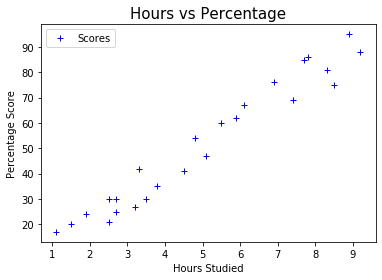

In [17]:
Data.plot(x='Hours', y='Scores', style='+',color='blue')  
plt.title('Hours vs Percentage',fontsize=15)  
plt.xlabel('Hours Studied',)  
plt.ylabel('Percentage Score')  
plt.show()

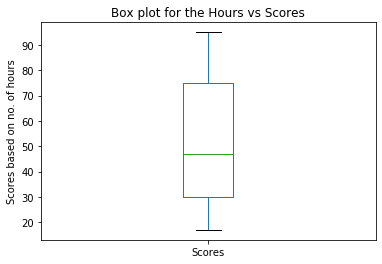

In [18]:
Data_scores = Data['Scores']
Data_scores.plot(kind='box', figsize=(6, 4))
plt.title('Box plot for the Hours vs Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

In [20]:
correlations=Data.corr(method='pearson')
print(correlations)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


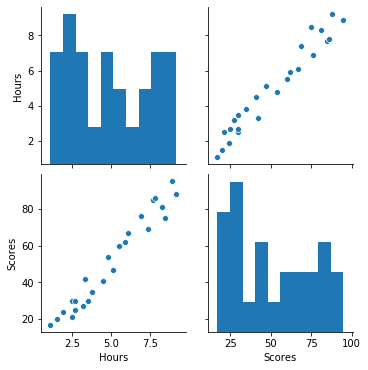

In [23]:

sns.pairplot(Data)

Preparing data

In [24]:
X=Data.iloc[:,:-1].values
y=Data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [25]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Split data into two dataset testing and training dataset¶


In [26]:
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=0)

In [27]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


Training the algorithm

In [28]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training the model....")
print("Training completed....")

Training the model....
Training completed....


In [29]:
print("B0 =",regressor.intercept_,"\nB1 =",regressor.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.018160041434683 
B1 = [9.91065648]


In [30]:
Y0 = regressor.intercept_ + regressor.coef_*X_train

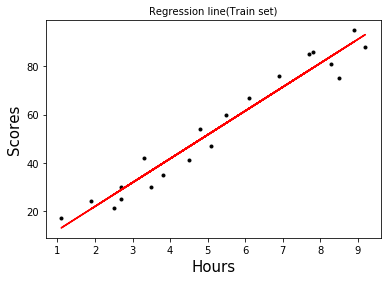

In [31]:
plt.scatter(X_train,y_train,color='black',marker='.')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [32]:
print("Accuracy of Training learning rate -",regressor.score(X_train, y_train)*100)
print("Accuracy of Testing learning rate - ",regressor.score(X_test, y_test)*100)

Accuracy of Training learning rate - 95.15510725211553
Accuracy of Testing learning rate -  94.54906892105356


MAKING PREDICTIONS

In [33]:
##predicting the Scores for test data
y_pred=regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [34]:
#now print the Y_test.
y_test


array([20, 27, 69, 30, 62], dtype=int64)

In [35]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


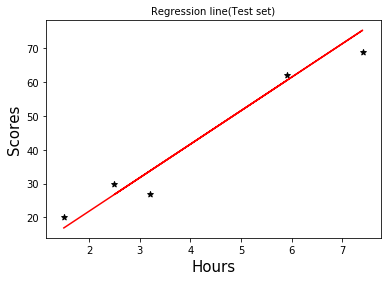

In [36]:
plt.plot(X_test,y_pred,color='red')
plt.scatter(X_test,y_test,color='black',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

ACCURACY THE *MODEL*

In [37]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)##Goodness of fit Test

0.9454906892105356

PREDICTING THE SCORE

In [39]:
Prediction_score = regressor.predict([[9.25]])
print("predicted score for a student studying 9.25 hours per day is :",Prediction_score)

predicted score for a student studying 9.25 hours per day is : [93.69173249]


Conclusion 
From the above result we can say that if a studied for 9.25 hours in a day then student will secured 93.69 MARKS